Let's load the csv file we generated using `blur_evaluation_vgg_cnn.py`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('test_vgg_cnn.csv', index_col=0)

In [3]:
df.head()

,labels,image_paths,blur_sizes,predictions
0,0,C:/Users/buckl/Documents/GitHub/wooden-tools/d...,0,1.343193e-07
1,0,C:/Users/buckl/Documents/GitHub/wooden-tools/d...,1,1.343193e-07
2,0,C:/Users/buckl/Documents/GitHub/wooden-tools/d...,2,6.781585e-07
3,0,C:/Users/buckl/Documents/GitHub/wooden-tools/d...,3,9.239679e-07
4,0,C:/Users/buckl/Documents/GitHub/wooden-tools/d...,4,1.492671e-06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101819 entries, 0 to 101818
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   labels       101819 non-null  int64  
 1   image_paths  101819 non-null  object 
 2   blur_sizes   101819 non-null  int64  
 3   predictions  101819 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.9+ MB


In [5]:
df.labels = df.labels.astype('category')
df.image_paths = df.image_paths.astype('string')
df.blur_sizes = df.blur_sizes.astype('int32')
df.predictions = df.predictions.astype('float32')

In [6]:
df.describe()

,blur_sizes,predictions
count,101819.000000,1.018190e+05
mean,124.499239,5.094573e-02
std,72.169156,2.035753e-01
min,0.000000,1.220752e-29
25%,62.000000,3.040216e-10
50%,124.000000,2.075638e-07
75%,187.000000,3.129759e-05
max,249.000000,1.000000e+00


In [7]:
results = []
for b in range(max(df['blur_sizes'])+1):
    blur_set = df[df.blur_sizes == b]
    preds = np.round(blur_set.predictions.to_numpy())
    labels = blur_set.labels.to_numpy().astype('int32')
    results.append(accuracy_score(labels, preds))

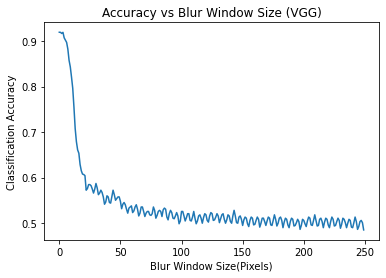

In [10]:
plt.plot(list(range(max(df['blur_sizes']) +1)), results)
plt.title('Accuracy vs Blur Window Size (VGG)')
plt.xlabel('Blur Window Size(Pixels)')
plt.ylabel('Classification Accuracy')
plt.savefig('blur_accuracy_vgg_cnn')